# Problem Statement

### Demand forecasts are fundamental to planning and delivering products and services. Accurate forecasting of demand can help the manufacturers to maintain appropriate stock which results in a reduction in loss due to product not being sold and also reduces the opportunity cost (i.e. higher demand but less availability => opportunity lost). Despite such relevance, manufacturers have difficulty choosing which forecast model is the best for their use case. In this project, historical sales data corresponding to multiple(25) items sold in 10 stores are provided and participants are expected to come up with the best model to predict the future demand for products which results in maximum profit for the manufacturer. Predict the demand for the next 3 months at the item level (i.e. all the stores combined).

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data 

In [3]:
df = pd.read_csv("C:\\Users\\seeyo\\Desktop\\rNkds\\train 2.csv")
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
print(df.columns)
df.shape

Index(['date', 'store', 'item', 'sales'], dtype='object')


(913000, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [6]:
df["date"] = df["date"].astype('datetime64[ns]')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


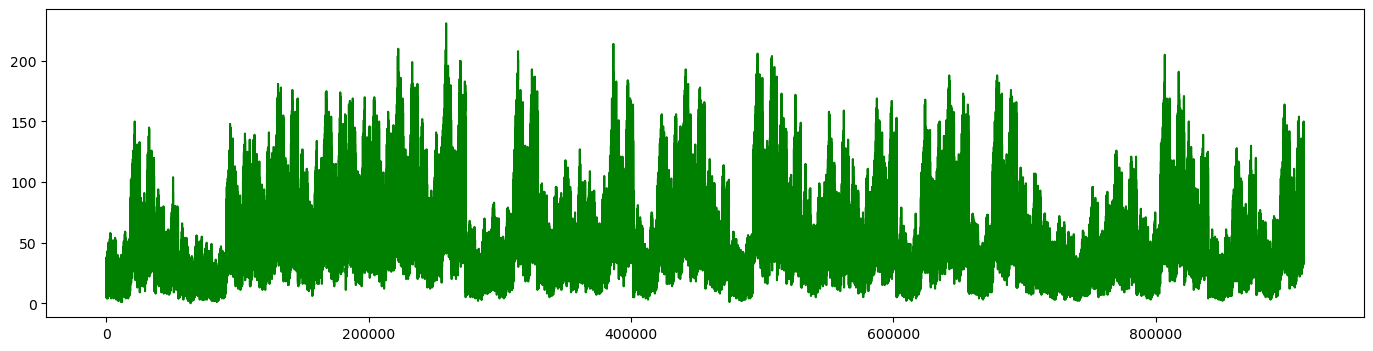

In [24]:
plt.figure(figsize=(17,4))
df["sales"].plot(c="g")
plt.show()

### here we are seperating as much we need by the date column by Year, month, day, Quarter, Monthstart Etc...

In [12]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day_of_week']=df['date'].dt.day_of_week
df['day_of_year']=df['date'].dt.day_of_year
df['days_in_month']=df['date'].dt.days_in_month
df['quarter']=df['date'].dt.quarter
df['is_month_start']=df['date'].dt.is_month_start
df['is_month_end']=df['date'].dt.is_month_end
df['is_quarter_start']=df['date'].dt.is_quarter_start
df['is_quarter_end']=df['date'].dt.is_quarter_end
df['is_year_start']=df['date'].dt.is_year_start
df['is_year_end']=df['date'].dt.is_year_end

In [13]:
df['item']=df['item'].astype(np.int32)
df['year']=df['year'].astype(np.int32)
df['sales']=df['sales'].astype(np.int32)
df['month']=df['month'].astype(np.int32)
df['day']=df['day'].astype(np.int32)
df['day_of_week']=df['day_of_week'].astype(np.int32)
df['day_of_year']=df['day_of_year'].astype(np.int32)
df['days_in_month']=df['days_in_month'].astype(np.int32)
df['quarter']=df['quarter'].astype(int)
df['is_month_start']=df['is_month_start'].astype(np.int32)
df['is_month_end']=df['is_month_end'].astype(np.int32)
df['is_quarter_start']=df['is_quarter_start'].astype(np.int32)
df['is_quarter_end']=df['is_quarter_end'].astype(np.int32)
df['is_year_start']=df['is_year_start'].astype(np.int32)
df['is_year_end']=df['is_year_end'].astype(np.int32)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              913000 non-null  datetime64[ns]
 1   store             913000 non-null  int64         
 2   item              913000 non-null  int32         
 3   sales             913000 non-null  int32         
 4   year              913000 non-null  int32         
 5   month             913000 non-null  int32         
 6   day               913000 non-null  int32         
 7   day_of_week       913000 non-null  int32         
 8   day_of_year       913000 non-null  int32         
 9   days_in_month     913000 non-null  int32         
 10  quarter           913000 non-null  int32         
 11  is_month_start    913000 non-null  int32         
 12  is_month_end      913000 non-null  int32         
 13  is_quarter_start  913000 non-null  int32         
 14  is_q

None

In [14]:
#copying df data to df1
df1=df.copy()

In [15]:
df1.groupby(['item','date']).mean().reset_index()

,item,date,store,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,2013-01-01,5.5,13.3,2013.0,1.0,1.0,1.0,1.0,31.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,2013-01-02,5.5,9.9,2013.0,1.0,2.0,2.0,2.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2013-01-03,5.5,12.7,2013.0,1.0,3.0,3.0,3.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2013-01-04,5.5,14.5,2013.0,1.0,4.0,4.0,4.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2013-01-05,5.5,14.9,2013.0,1.0,5.0,5.0,5.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91295,50,2017-12-27,5.5,51.1,2017.0,12.0,27.0,2.0,361.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
91296,50,2017-12-28,5.5,58.7,2017.0,12.0,28.0,3.0,362.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
91297,50,2017-12-29,5.5,59.6,2017.0,12.0,29.0,4.0,363.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
91298,50,2017-12-30,5.5,61.2,2017.0,12.0,30.0,5.0,364.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='item', ylabel='sales'>

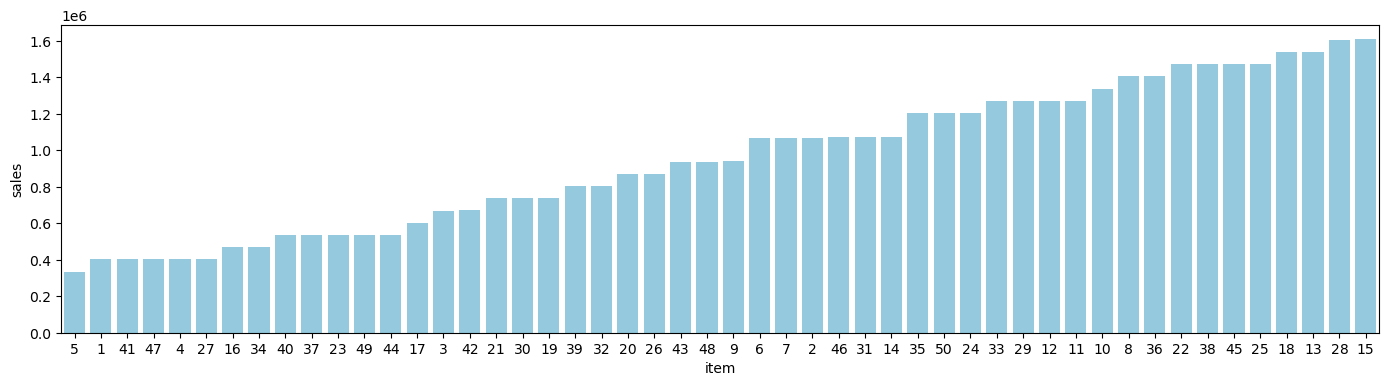

In [20]:
plt.figure(figsize=(17,4))
#figure(figsize=(18, 4), dpi=80)
item_sum = df.groupby(["item"],as_index=False).agg({"sales": "sum"}).sort_values(by="sales",ascending=False)
sns.barplot(data=item_sum,x='item',y='sales',color="skyblue",order=item_sum.sort_values('sales').item)

In [84]:
df1.tail()

,date,store,item,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
912995,2017-12-27,10,50,63,2017,12,27,2,361,31,4,0,0,0,0,0,0
912996,2017-12-28,10,50,59,2017,12,28,3,362,31,4,0,0,0,0,0,0
912997,2017-12-29,10,50,74,2017,12,29,4,363,31,4,0,0,0,0,0,0
912998,2017-12-30,10,50,62,2017,12,30,5,364,31,4,0,0,0,0,0,0
912999,2017-12-31,10,50,82,2017,12,31,6,365,31,4,0,1,0,1,0,1


### For Train we just Selecting the 2013 to 2016 

In [85]:
#finding the number of items
num_item=len(df1['item'].unique())
#creating Training data
train_df1=df1.loc[df1['year'].isin([2013,2014,2015,2016])].reset_index()
train_df1.drop('index',axis=1,inplace=True)
train_df1

,date,store,item,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2013-01-01,1,1,13,2013,1,1,1,1,31,1,1,0,1,0,1,0
1,2013-01-02,1,1,11,2013,1,2,2,2,31,1,0,0,0,0,0,0
2,2013-01-03,1,1,14,2013,1,3,3,3,31,1,0,0,0,0,0,0
3,2013-01-04,1,1,13,2013,1,4,4,4,31,1,0,0,0,0,0,0
4,2013-01-05,1,1,10,2013,1,5,5,5,31,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730495,2016-12-27,10,50,60,2016,12,27,1,362,31,4,0,0,0,0,0,0
730496,2016-12-28,10,50,43,2016,12,28,2,363,31,4,0,0,0,0,0,0
730497,2016-12-29,10,50,68,2016,12,29,3,364,31,4,0,0,0,0,0,0
730498,2016-12-30,10,50,63,2016,12,30,4,365,31,4,0,0,0,0,0,0


### For test data selecting the year 2017 

In [86]:
test_df1=df1.loc[df1['year'].isin([2017])].reset_index()
test_df1.drop('index',axis=1,inplace=True)
test_df1

,date,store,item,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2017-01-01,1,1,19,2017,1,1,6,1,31,1,1,0,1,0,1,0
1,2017-01-02,1,1,15,2017,1,2,0,2,31,1,0,0,0,0,0,0
2,2017-01-03,1,1,10,2017,1,3,1,3,31,1,0,0,0,0,0,0
3,2017-01-04,1,1,16,2017,1,4,2,4,31,1,0,0,0,0,0,0
4,2017-01-05,1,1,14,2017,1,5,3,5,31,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182495,2017-12-27,10,50,63,2017,12,27,2,361,31,4,0,0,0,0,0,0
182496,2017-12-28,10,50,59,2017,12,28,3,362,31,4,0,0,0,0,0,0
182497,2017-12-29,10,50,74,2017,12,29,4,363,31,4,0,0,0,0,0,0
182498,2017-12-30,10,50,62,2017,12,30,5,364,31,4,0,0,0,0,0,0


# 

In [87]:
# as per the problem Statement to predict that for the next 3 months~ 90days
for i in range(1,num_item+1,1):
  test_df1.loc[test_df1['item'].isin([i]),'sales_3mon']=test_df1.loc[test_df1['item'].isin([i]),'sales'].rolling(90,center=True,min_periods=1).sum().fillna(0)
  train_df1.loc[train_df1['item'].isin([i]),'sales_3mon']=train_df1.loc[train_df1['item'].isin([i]),'sales'].rolling(90,center=True,min_periods=1).sum().fillna(0)

In [88]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182500 entries, 0 to 182499
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              182500 non-null  datetime64[ns]
 1   store             182500 non-null  int64         
 2   item              182500 non-null  int32         
 3   sales             182500 non-null  int32         
 4   year              182500 non-null  int32         
 5   month             182500 non-null  int32         
 6   day               182500 non-null  int32         
 7   day_of_week       182500 non-null  int32         
 8   day_of_year       182500 non-null  int32         
 9   days_in_month     182500 non-null  int32         
 10  quarter           182500 non-null  int32         
 11  is_month_start    182500 non-null  int32         
 12  is_month_end      182500 non-null  int32         
 13  is_quarter_start  182500 non-null  int32         
 14  is_q

## Checking for the Null Values 

In [89]:
print(test_df1.isnull().sum())
print(train_df1.isnull().sum())

date                0
store               0
item                0
sales               0
year                0
month               0
day                 0
day_of_week         0
day_of_year         0
days_in_month       0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
sales_3mon          0
dtype: int64
date                0
store               0
item                0
sales               0
year                0
month               0
day                 0
day_of_week         0
day_of_year         0
days_in_month       0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
sales_3mon          0
dtype: int64


## From the above all the Values are not null 

## Here the sales Column is our Target  

In [90]:
train_df1['sales_3mon']=train_df1['sales_3mon'].astype(np.int32)
test_df1['sales_3mon']=test_df1['sales_3mon'].astype(np.int32)

In [91]:
df['is_year_end']=df['is_year_end'].astype(int)

In [92]:
X_train=pd.DataFrame()
X_test=pd.DataFrame()
y_train=pd.DataFrame()
y_test=pd.DataFrame()

y_train=train_df1['sales_3mon']
y_test=test_df1['sales_3mon']

# Splitting the data for the Training and Testing

In [93]:
# droping the date, sale_3mon on the train and test 
train_df1.drop('date',axis=1,inplace=True)
test_df1.drop('date',axis=1,inplace=True)
train_df1.drop('sales_3mon',axis=1,inplace=True)
test_df1.drop('sales_3mon',axis=1,inplace=True)
train_df1.drop('sales',axis=1,inplace=True)
test_df1.drop('sales',axis=1,inplace=True)

In [94]:
X_train=train_df1.copy()
X_test=test_df1.copy()

<AxesSubplot:>

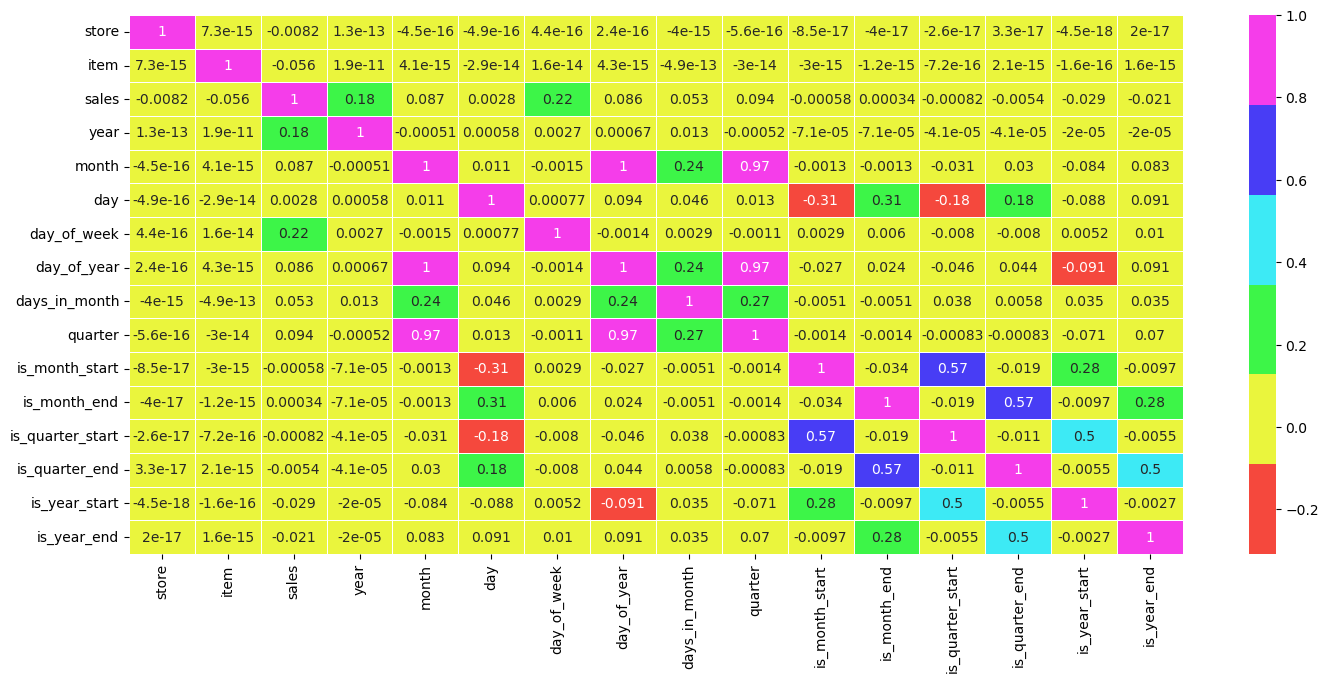

In [49]:
plt.figure(figsize=(17,7))
sns.heatmap(df1.corr(), annot=True, linewidth=.5,cmap=sns.hls_palette(s=0.9))

In [50]:
X_train

,store,item,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,1,2013,1,1,1,1,31,1,1,0,1,0,1,0
1,1,1,2013,1,2,2,2,31,1,0,0,0,0,0,0
2,1,1,2013,1,3,3,3,31,1,0,0,0,0,0,0
3,1,1,2013,1,4,4,4,31,1,0,0,0,0,0,0
4,1,1,2013,1,5,5,5,31,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730495,10,50,2016,12,27,1,362,31,4,0,0,0,0,0,0
730496,10,50,2016,12,28,2,363,31,4,0,0,0,0,0,0
730497,10,50,2016,12,29,3,364,31,4,0,0,0,0,0,0
730498,10,50,2016,12,30,4,365,31,4,0,0,0,0,0,0


In [51]:
y_train

0          508
1          519
2          526
3          537
4          547
          ... 
730495    3559
730496    3472
730497    3367
730498    3308
730499    3221
Name: sales_3, Length: 730500, dtype: int32

# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
import sklearn.metrics as metrics
y_pred = regressor.predict(X_test)
r2 = metrics.r2_score(y_test,y_pred)
print(r2)

-0.042575682481583055


# Decision Tree

In [54]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 

In [55]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [56]:
#Predicting the test set result  
from sklearn.metrics import r2_score
y_pred= dt_regressor.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.9850278166897539


### Here the Value for the R**2 Score is Good

# KNN 

In [84]:
from sklearn import preprocessing, neighbors
possible_k=[1,2,3,4,5,6,7,8,9]
r2=[]
for k in possible_k:
  knn_reg = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')
  knn_reg.fit(X_train, y_train)
  y_pred= knn_reg.predict(X_test)
  print(r2_score(y_test,y_pred))

0.354146916650363
0.354146916650363
0.354146916650363
0.354146916650363
0.354146916650363
0.354146916650363
0.354146916650363
0.354146916650363
0.354146916650363


# Xg Boost

In [85]:
import xgboost as xgb
import random
import math  
import sklearn.metrics  
from sklearn.metrics import r2_score

xgb = xgb.XGBRegressor(n_estimators=200, learning_rate=0.8, gamma=0, subsample=random.uniform(0.75,0.8),
                           colsample_bytree=1, max_depth=7,seed=0)

In [86]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
score1 = r2_score(y_test,y_pred)
score1

0.9842284586596064

## The R2 Score for the Decision Tree and Xg boost Gives Good Score